In [5]:
# 5.2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [20]:
y_iris = iris['species']
y_iris.shape

(150,)

其中的每行数据表示每朵被观察的鸢尾花,行数表示数据集中记录的鸢尾花总数。一般情
况下，会将这个矩阵的行称为样本（samples），行数记为 n_samples。
同样，每列数据表示每个样本某个特征的量化值。一般情况下，会将矩阵的列称为特征
（features），列数记为 n_features。

In [7]:
#sns.pairplot(iris, hue='species', size=1.5);

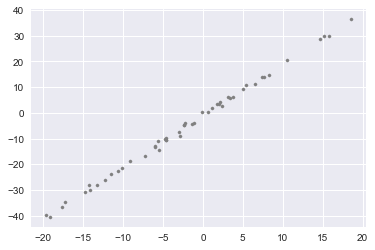

In [14]:
rng = np.random.RandomState(42) 
x = 10 * rng.randn(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y, s=10, color='gray');

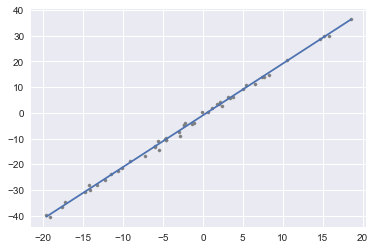

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X, y)
xfit = np.linspace(x.min(), x.max())
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y, color='gray', s=10)
plt.plot(xfit, yfit);

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, 
                                                #train_size=0.25, 
                                                random_state=1)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9736842105263158

In [23]:
from sklearn.decomposition import PCA # 1：选择模型类
model = PCA(n_components=2) # 2：设置超参数，初始化模型
model.fit(X_iris)  # 3：拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris) # 4：将数据转化为二维

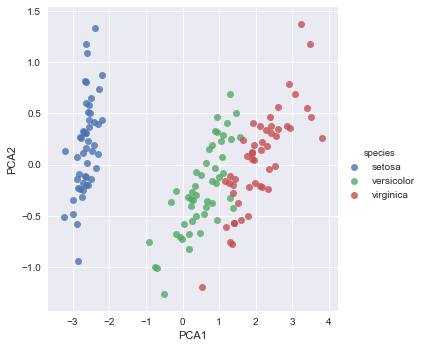

In [27]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);


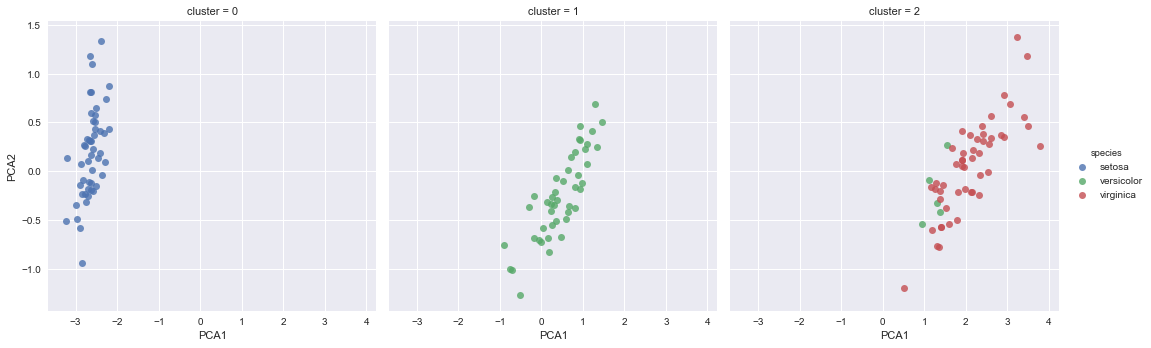

In [29]:
from sklearn.mixture import GMM
model = GMM(n_components=3,
            covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In [30]:
# 5.2.3　应用：手写数字探索
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

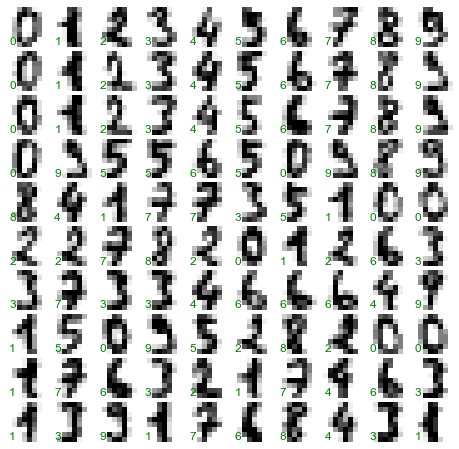

In [34]:
# 对前100张图像可视化
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw={'xticks': [], 'yticks': []},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    # 角标是图像代表的数字
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [35]:
X = digits.data
X.shape

(1797, 64)

In [36]:
y = digits.target
y.shape

(1797,)

In [37]:
# 对64维的数据降维
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

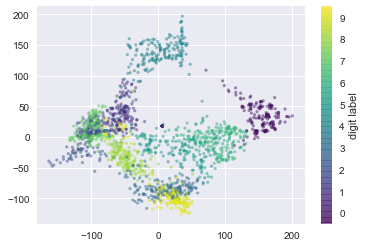

In [50]:
# 将数据画出
"""plt.scatter(data_projected[:,0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digits label', ticks=range(10))
plt.clim(-0.5, 9.5);"""
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, 
            edgecolor='none', alpha=0.5, 
            cmap='viridis', s=10)
plt.colorbar(label='digit label', ticks=range(10)) 
plt.clim(-0.5, 9.5);

In [51]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [53]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

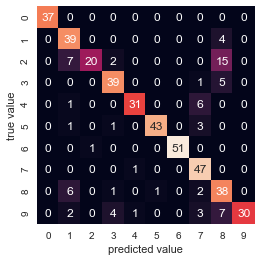

In [56]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

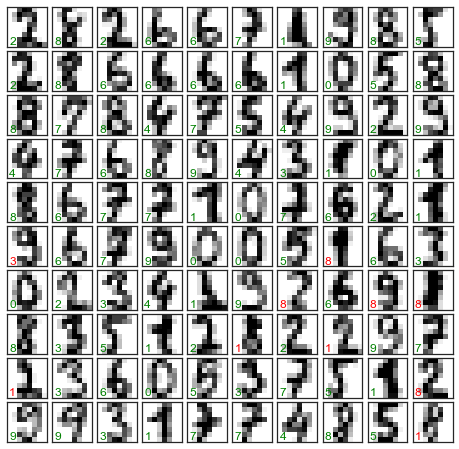

In [62]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_pred[i]) else 'red')